<a href="https://colab.research.google.com/github/d-maniatakos/thesis/blob/main/Holt_Winters_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Holt-Winters

## Import Packages

In [94]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
import matplotlib.pyplot as plt

## Perform Holt-Winters

In [104]:
def forecast(df, horizon, seasonal_periods):
  model = HWES(df, seasonal_periods=seasonal_periods, trend='add', seasonal='mul')
  forecasts = model.fit().forecast(steps=horizon)
  return forecasts

## Experiments

### Air Passengers

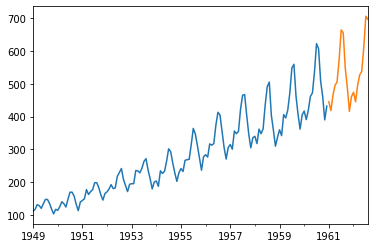

In [96]:
df = pd.read_csv('AirPassengers.csv')
df.index = pd.date_range(start='1949-01', end='1961-01', freq='M').to_period('M')
df = df['#Passengers']

df.plot()
forecast(df, 20, 12).plot()
plt.show()

### Monthly Car Sales

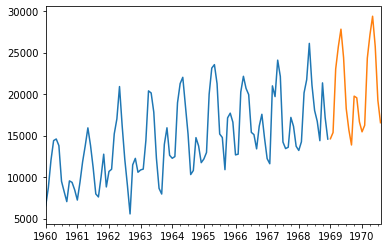

In [97]:
df = pd.read_csv('monthly-car-sales.csv')
df.index = pd.date_range(start='1960-01', end='1969-01', freq='M').to_period('M')
df = df['Sales']
df

df.plot()
forecast(df, 20, 12).plot()
plt.show()

### Shampoo Sales

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


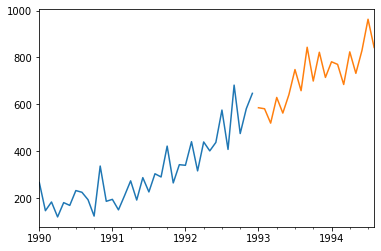

In [98]:
df = pd.read_csv('shampoo_sales.csv')
df.index = pd.date_range(start='1990-01', end='1993-01', freq='M').to_period('M')
df = df['Sales']
df

df.plot()
forecast(df, 20, 12).plot()
plt.show()

### UBER Stock

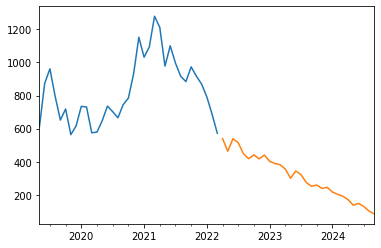

In [99]:
df = pd.read_csv('UBER.csv')
df.index = df['Date']
df = df['Adj Close']
df.index = pd.to_datetime(df.index)
df = df.resample(rule='M').sum()
df.index = pd.date_range(start='2019-05', end='2022-04', freq='M').to_period('M')

df.plot()
forecast(df, 30, 12).plot()
plt.show()

### Daily Mean Temperatures

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


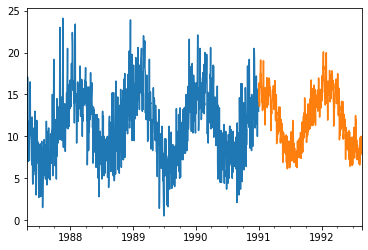

In [107]:
df = pd.read_csv('daily-min-temperatures.csv')
df.index = df['Date']
df = df['Temp']
df.index = pd.date_range(start='1981-01-01', end='1990-12-31', freq='D').to_period('D')
df = df[len(df)-5000:]

df.plot()
forecast(df, 600, 365).plot()
plt.show()